### Подготовка и анализ данных

In [2]:
import numpy as np
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns

In [3]:
data = pd.read_csv('data/adult.csv')
data.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
data.shape

(48842, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.isna().sum() # пропусков нет, крутые данные 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

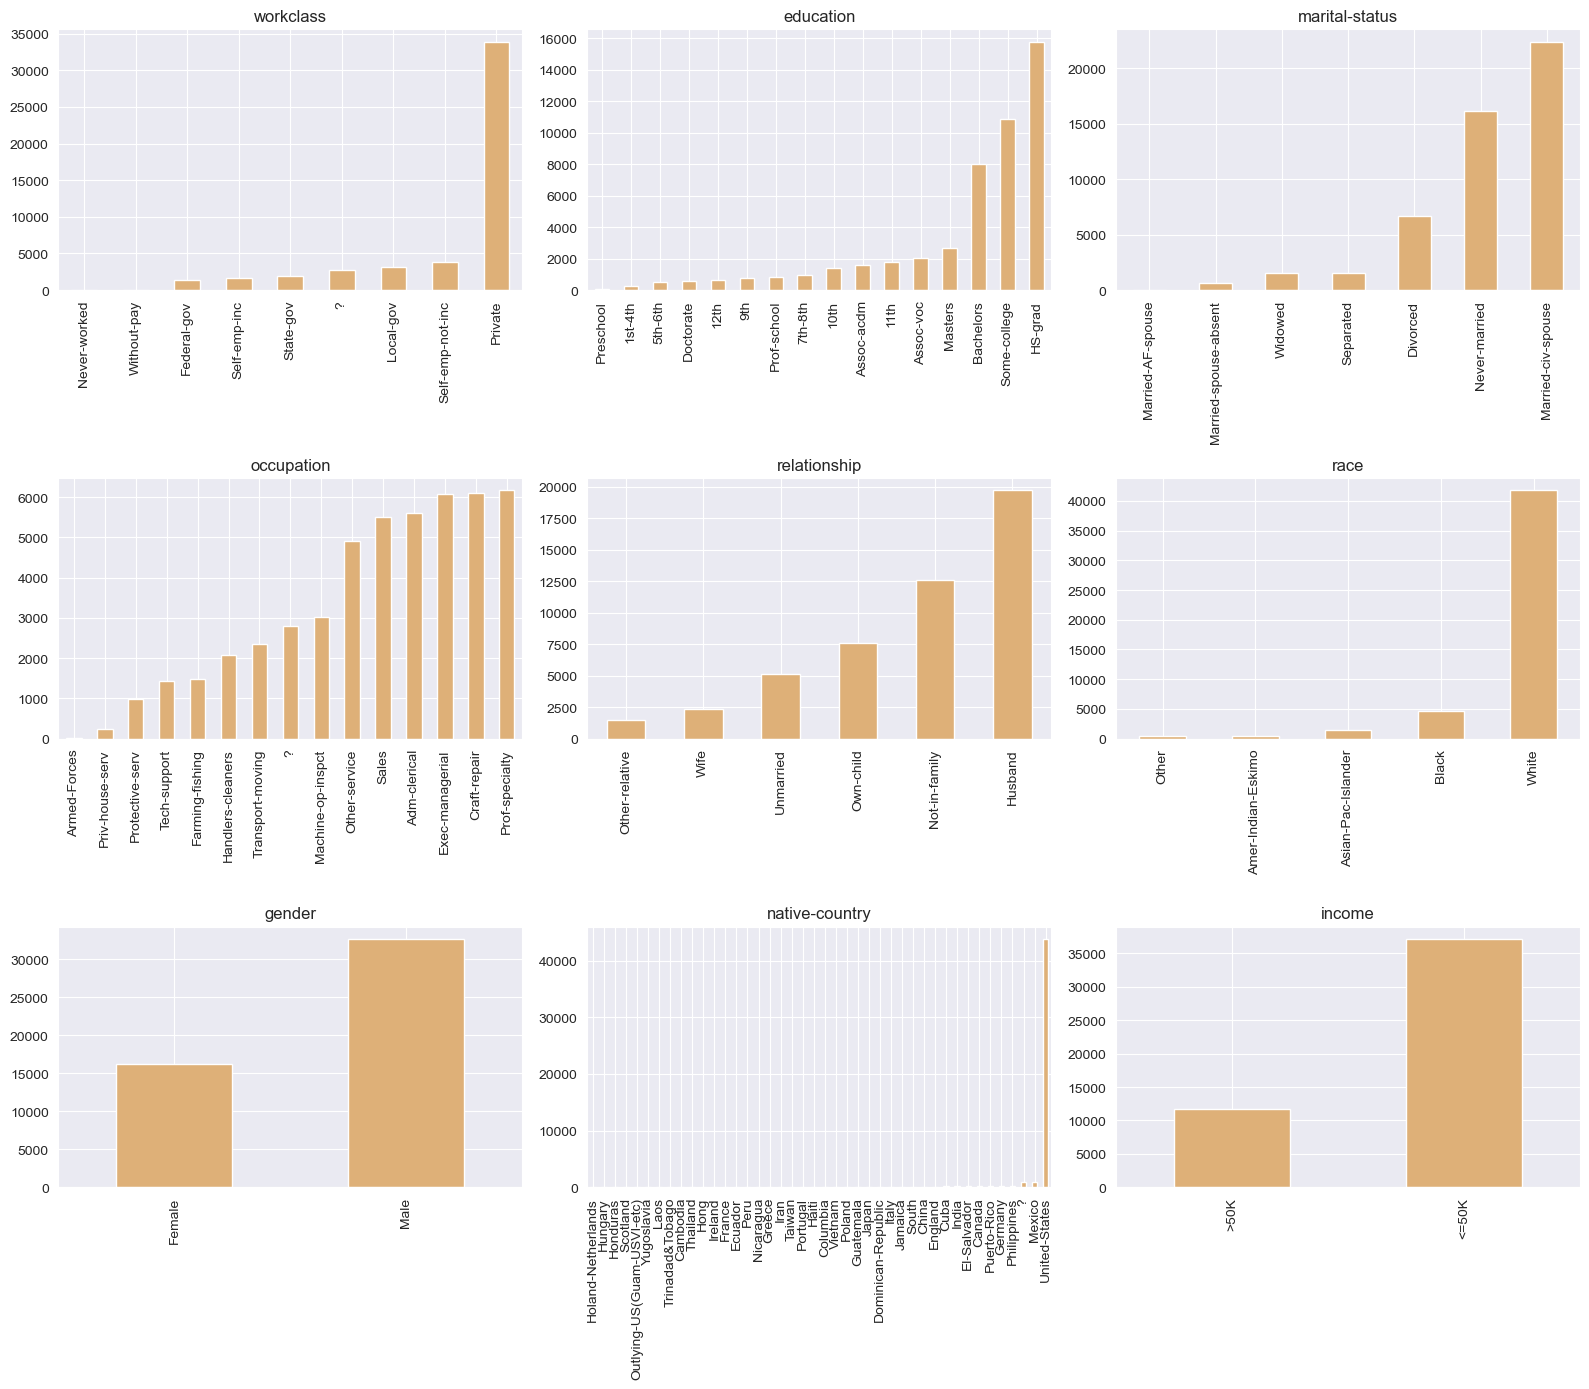

In [7]:
import math
fields=data.select_dtypes(exclude="number").columns

figuresize=(16,14)
cols=3
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    data[fields[i-1]].value_counts().sort_values().plot.bar(color='#DEB078')
    plt.xticks(rotation=90)
    plt.title(fields[i-1])

plt.tight_layout()
plt.show()

###### Смотрим, какие переменные наибольшим образом кореллируют с целевой переменной или друг с другом, где больше всего полезной информации

In [8]:
data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


<AxesSubplot:>

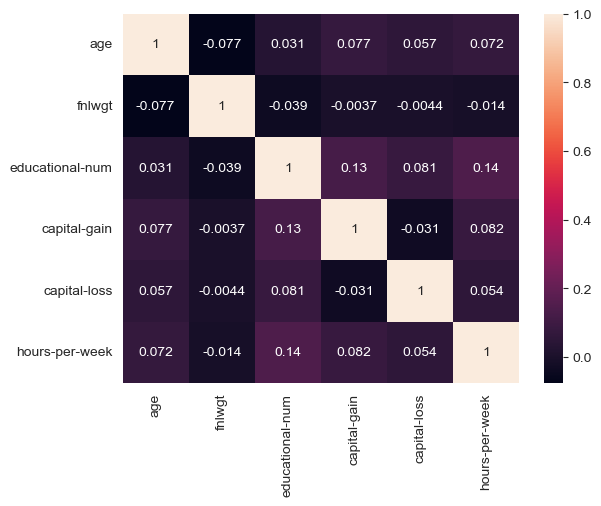

In [9]:
sns.heatmap(data.corr(), annot=True)

In [10]:
selectesColumns = data[['age', 'education', 'educational-num',
                        'marital-status', 'occupation', 'relationship', 'race', 'gender',
                        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']] 

In [11]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Тест 1

###### Берем данные "по интуиции", но которые теоретически могут дать хорошую точность 

In [12]:
dataFrame = data[['age', 'gender', 'capital-gain', 'capital-loss', 'occupation', 'income']]

In [13]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [14]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [15]:
# столбец occupation - категориальная переменная (не путать с континуальными)
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
dataFrame = pd.get_dummies(dataFrame, columns=['occupation'])
dataFrame = pd.get_dummies(dataFrame, columns=['gender'])

In [16]:
dataFrame.head()

,age,capital-gain,capital-loss,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,gender_Female,gender_Male
0,25,0,0,<=50K,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,38,0,0,<=50K,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,28,0,0,>50K,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,44,7688,0,>50K,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,18,0,0,<=50K,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# целевая переменная (столбец gender) снова является категориальной 
# переведем значения столбца в числа

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
le.fit(dataFrame['income'])

LabelEncoder()

In [19]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [20]:
le.transform(['<=50K', '<=50K', '>50K']) # пример расшифровки

array([0, 0, 1])

In [21]:
Y = pd.Series(data=le.transform(data['income']))
X = dataFrame
del X['income']

In [22]:
X

,age,capital-gain,capital-loss,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,gender_Female,gender_Male
0,25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,38,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,28,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,44,7688,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
48838,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
48839,58,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
Y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [24]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [25]:
X.shape[0] == Y.shape[0]

True

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [27]:
# обучаем на части датасета (train)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [28]:
predictions[:5]

array([0, 0, 0, 0, 0])

In [29]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
model.predict_proba(X_test)

array([[0.87609821, 0.12390179],
       [0.92321324, 0.07678676],
       [0.56754682, 0.43245318],
       ...,
       [0.88543988, 0.11456012],
       [0.93638833, 0.06361167],
       [0.8645787 , 0.1354213 ]])

In [31]:
%%time
model.score(X_train, Y_train)

CPU times: user 27.4 ms, sys: 13.7 ms, total: 41.1 ms
Wall time: 9.07 ms


0.8167276636040233

In [32]:
%%time
model.score(X_test,Y_test)

CPU times: user 7.61 ms, sys: 3.52 ms, total: 11.1 ms
Wall time: 2.91 ms


0.8143105742655339

In [33]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [34]:
clf.score(X_train, Y_train)

0.8262994906969007

In [35]:
clf.score(X_test, Y_test)

0.8248541304125294

In [36]:
%%time
svc = SVC()
svc.fit(X_train, Y_train) #Без StandardScaler

CPU times: user 41.1 s, sys: 420 ms, total: 41.6 s
Wall time: 41.9 s


SVC()

In [37]:
%%time
svc.score(X_train, Y_train)

CPU times: user 58.6 s, sys: 510 ms, total: 59.1 s
Wall time: 59.6 s


0.8025490748086914

In [38]:
%%time
svc.score(X_test, Y_test)

CPU times: user 14.5 s, sys: 102 ms, total: 14.6 s
Wall time: 14.7 s


0.8037670181185382

In [39]:
y2 = clf.predict(X_test)

In [40]:
y2

array([0, 0, 1, ..., 0, 0, 0])

Miniumum age: 17
Maximum age: 90


Text(0.5, 0, 'Age')

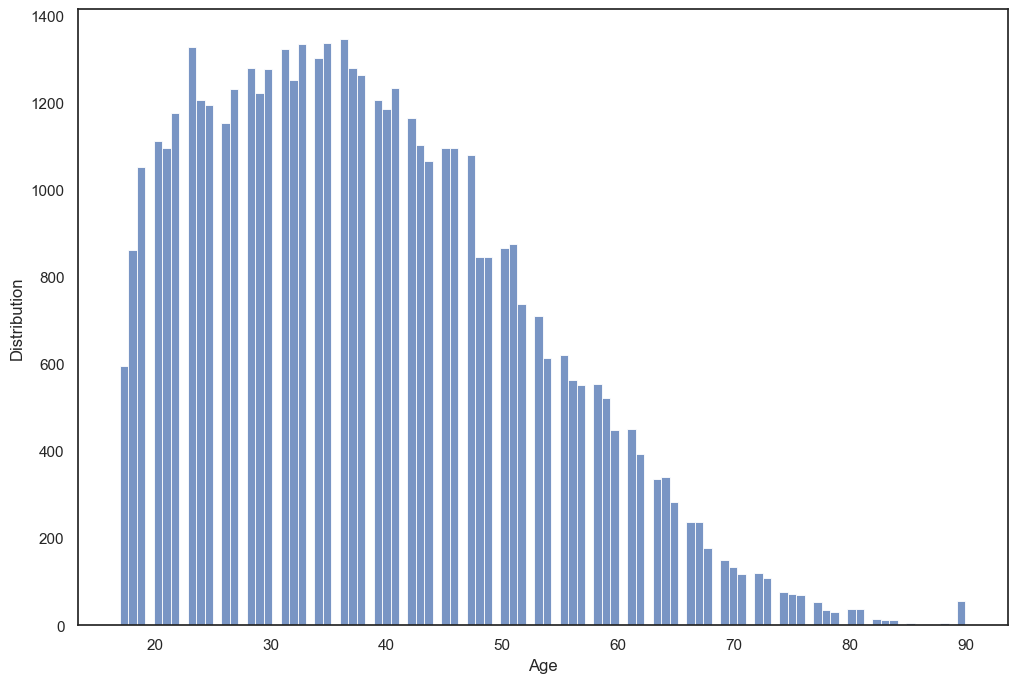

In [41]:
print('Miniumum age:', X['age'].min())
print('Maximum age:', X['age'].max())
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style='white')
sns.histplot(X['age'], bins=100)
plt.ylabel("Distribution", fontsize=12)
plt.xlabel("Age", fontsize=12)

###### Интересно посмотреть как может возраст влиять: молодежи намного больше, чем людей старше 50 лет 

In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(Y_test,y2)*100,"%")

Accuracy :  82.48541304125294 %


### Тест 2

###### Берем как можно больше значимых данных (будет много шума, но затестить нужно, вдруг моель станет очень умной)

In [43]:
dataFrame2 = data[['age', 'gender', 'educational-num', 'marital-status', 'relationship', 'hours-per-week', 'occupation', 'income']]

In [44]:
dataFrame2

,age,gender,educational-num,marital-status,relationship,hours-per-week,occupation,income
0,25,Male,7,Never-married,Own-child,40,Machine-op-inspct,<=50K
1,38,Male,9,Married-civ-spouse,Husband,50,Farming-fishing,<=50K
2,28,Male,12,Married-civ-spouse,Husband,40,Protective-serv,>50K
3,44,Male,10,Married-civ-spouse,Husband,40,Machine-op-inspct,>50K
4,18,Female,10,Never-married,Own-child,30,?,<=50K
...,...,...,...,...,...,...,...,...
48837,27,Female,12,Married-civ-spouse,Wife,38,Tech-support,<=50K
48838,40,Male,9,Married-civ-spouse,Husband,40,Machine-op-inspct,>50K
48839,58,Female,9,Widowed,Unmarried,40,Adm-clerical,<=50K
48840,22,Male,9,Never-married,Own-child,20,Adm-clerical,<=50K


In [45]:
dataFrame2 = pd.get_dummies(dataFrame2, columns=['gender', 'educational-num', 'marital-status', 'relationship', 'occupation'])

In [46]:
dataFrame2

,age,hours-per-week,income,gender_Female,gender_Male,educational-num_1,educational-num_2,educational-num_3,educational-num_4,educational-num_5,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,40,<=50K,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,50,<=50K,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,40,>50K,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,40,>50K,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,30,<=50K,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,38,<=50K,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,40,>50K,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,40,<=50K,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,20,<=50K,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
le.fit(dataFrame2['income'])
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [48]:
le.transform(['<=50K', '<=50K', '>50K'])  # пример расшифровки

array([0, 0, 1])

In [49]:
Y = pd.Series(data=le.transform(dataFrame2['income']))
X = dataFrame2
del X['income']

In [50]:
X

,age,hours-per-week,gender_Female,gender_Male,educational-num_1,educational-num_2,educational-num_3,educational-num_4,educational-num_5,educational-num_6,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,40,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,50,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,40,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,30,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,38,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,40,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
model2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [52]:
X.shape[0] == Y.shape[0]

True

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [54]:
# обучаем на части датасета (train)
model2.fit(X_train, Y_train)
predictions = model2.predict(X_test)
predictions[:5]

array([0, 0, 0, 0, 1])

In [55]:
model2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
model2.predict_proba(X_test)

array([[0.98930476, 0.01069524],
       [0.98319805, 0.01680195],
       [0.68923462, 0.31076538],
       ...,
       [0.77219045, 0.22780955],
       [0.97158276, 0.02841724],
       [0.95606777, 0.04393223]])

In [57]:
model2.score(X_train, Y_train)

CPU times: user 29.7 ms, sys: 14.4 ms, total: 44.2 ms
Wall time: 13.1 ms


0.8330048882860287

In [58]:
model2.score(X_test, Y_test)

0.8318149247620023

In [59]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)

0.8344892892790418

In [60]:
clf.score(X_test, Y_test)

0.8307912785341386

In [61]:
svc = SVC()
svc.fit(X_train, Y_train)

CPU times: user 58.4 s, sys: 471 ms, total: 58.9 s
Wall time: 59.5 s


SVC()

In [62]:
svc.score(X_train, Y_train)

0.8171627466536995

In [63]:
%%time
svc.score(X_test, Y_test)

CPU times: user 29.6 s, sys: 235 ms, total: 29.8 s
Wall time: 30 s


0.8121609171870202

Результаты действительно стали немного лучше, но! были взяты не все столбцы, тк некоторые совершенно не помогут нашей модели

### Тест 3

###### Еще немного меняем исходные данные

In [64]:
dataFrame3 = data[['age', 'marital-status', 'relationship', 'hours-per-week', 'occupation', 'income']]

In [65]:
dataFrame3

,age,marital-status,relationship,hours-per-week,occupation,income
0,25,Never-married,Own-child,40,Machine-op-inspct,<=50K
1,38,Married-civ-spouse,Husband,50,Farming-fishing,<=50K
2,28,Married-civ-spouse,Husband,40,Protective-serv,>50K
3,44,Married-civ-spouse,Husband,40,Machine-op-inspct,>50K
4,18,Never-married,Own-child,30,?,<=50K
...,...,...,...,...,...,...
48837,27,Married-civ-spouse,Wife,38,Tech-support,<=50K
48838,40,Married-civ-spouse,Husband,40,Machine-op-inspct,>50K
48839,58,Widowed,Unmarried,40,Adm-clerical,<=50K
48840,22,Never-married,Own-child,20,Adm-clerical,<=50K


In [66]:
dataFrame3 = pd.get_dummies(dataFrame3, columns=['marital-status', 'relationship', 'occupation'])

In [67]:
dataFrame3

,age,hours-per-week,income,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,40,<=50K,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,50,<=50K,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,40,>50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,40,>50K,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,30,<=50K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,38,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,40,>50K,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,40,<=50K,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48840,22,20,<=50K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
le.fit(dataFrame3['income'])
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [69]:
Y = pd.Series(data=le.transform(dataFrame3['income']))
X = dataFrame3
del X['income']

In [70]:
model3 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [71]:
X.shape[0] == Y.shape[0]

True

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [73]:
model3.fit(X_train, Y_train)
predictions = model3.predict(X_test)

In [74]:
model3.score(X_train, Y_train)

0.8205666316894019

In [75]:
model3.score(X_test, Y_test)

0.8167673252124066

In [76]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [78]:
clf.score(X_train, Y_train)

0.8251478002712871

In [79]:
clf.score(X_test, Y_test)

0.8223973794656567

In [80]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [81]:
svc.score(X_train, Y_train)

0.791774371049062

In [82]:
svc.score(X_test, Y_test)

0.7892312416828744

| №                              | Тест 1 | Тест 2 | Тест 3 |
|:-------------------------------|:------:|:------:|:------:|
| Логистическая регрессия (test) | 0.814  | 0.831  | 0.816  |
| SVM + StandardScaler    (test) | 0.824  | 0.830  | 0.822  |
| SVM                     (test) | 0.803  | 0.812  | 0.789  |


##### Вывод: лучшие показатели предсказания были у логистической регрессии с 83,1%. Вторая по точности предсказания была модель опорных векторов с использованием стандартизации диапазона данных, модель достигра 83% точности предсказания. Однако данная модель тратит больше всех временных и производительных ресурсов т.е. расчеты длятся дольше всего относительно обычного SVM и логистической регрессии. Логистическая регресстия проста и затраты на нее минимальны. К тому же лучше всего справилась с бинарной классификацией.